<a href="https://colab.research.google.com/github/Prog1xx1/studia/blob/main/Binary2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import urllib.request as urllib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, f1_score, plot_confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
tf.__version__

'2.5.0'

In [ ]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Krzywe ROC')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve dla klasy %s' % ( labels[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    return plt

def plot_conf_matrix(clf,X, y):
    fig_conf, ax_conf = plt.subplots(figsize=(15, 15))
    disp = plot_confusion_matrix(clf, X, y,
                             
                             cmap=plt.cm.Blues,
                             ax = ax_conf,
                             normalize='true')

    return plt

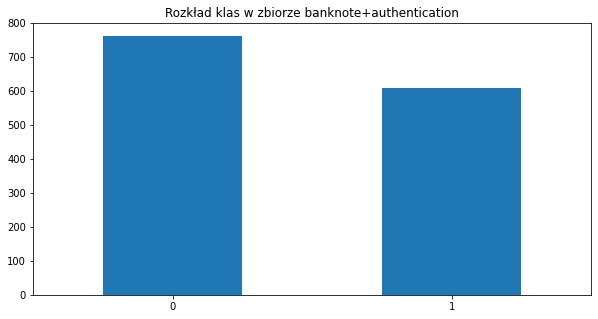

In [ ]:
zbior2 = pd.read_excel("data_banknote_authenticationR.xlsx")
zbior2
zbior2.Class.value_counts(dropna=False).plot(
    kind='bar',
    rot=0,
    title='Rozkład klas w zbiorze banknote+authentication',
    figsize=(10, 5)
)


In [ ]:
dane_do_treningu2, dane_do_testowania2 = train_test_split(zbior2, test_size=0.2)
le_zbior2 = LabelEncoder()

trening_label2 = le_zbior2.fit_transform(dane_do_treningu2['Class'].values)
test_label2 = le_zbior2.transform(dane_do_testowania2['Class'].values)
#dane_do_treningu2 = dane_do_treningu2.drop(['Class'], axis=1).reset_index().drop('index', axis=1)
#dane_do_testowania2 = dane_do_testowania2.drop(['Class'], axis=1).reset_index().drop('index', axis=1)
labels = le_zbior2.classes_

etykiety_trenowania = dane_do_treningu2.pop("Class")
etykiety_testu = dane_do_testowania2.pop("Class")
trenowanie1 = pd.get_dummies(etykiety_trenowania, prefix='Class')
test1 = pd.get_dummies(etykiety_testu, prefix="Class")

statystyka= dane_do_treningu2.describe()
statystyka = statystyka.transpose()
statystyka
def normalizacja(x):
  return (x - statystyka['mean'])/statystyka['std']
znormalizowany_trening = normalizacja(dane_do_treningu2)
znormalizowany_test = normalizacja(dane_do_testowania2)
trenowanie2 = pd.get_dummies(etykiety_trenowania, prefix='Class')
test2 = pd.get_dummies(etykiety_testu, prefix="Class")

In [ ]:
statystyka2= zbior2.describe()
#statystyka2 = statystyka2.transpose()
print(statystyka2)

       variance_of_Wavelet_Transformed_image  \
count                            1372.000000   
mean                                0.433735   
std                                 2.842763   
min                                -7.042100   
25%                                -1.773000   
50%                                 0.496180   
75%                                 2.821475   
max                                 6.824800   

       skewness_of_Wavelet_Transformed_image   \
count                             1372.000000   
mean                                 1.922353   
std                                  5.869047   
min                                -13.773100   
25%                                 -1.708200   
50%                                  2.319650   
75%                                  6.814625   
max                                 12.951600   

       curtosis_of_Wavelet_Transformed_image  entropy_of_image        Class  
count                            1372.000000   

In [ ]:
def budowa():
    model = Sequential()
    model.add(Dense(70, activation="relu", input_shape=(znormalizowany_trening.shape[1],)))       
    model.add(Dense(2, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 15
batch_size = 24
model = budowa()
model.summary()

history = model.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True
        #steps_per_epoch = int(znormalizowany_trening.shape[0] / batch_size)  
    )

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 70)                350       
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 142       
Total params: 492
Trainable params: 492
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 1s 2ms/step - loss: 0.6656 - accuracy: 0.6819
Epoch 2/15
46/46 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.8523
Epoch 3/15
46/46 [==============================] - 0s 2ms/step - loss: 0.5763 - accuracy: 0.8696
Epoch 4/15
46/46 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.8870
Epoch 5/15
46/46 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.8924
Epoch 6/15
46/46 [==========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


92.72727272727272
TN - True Negative: 141
FP - False Positive: 6
FN - False Negative: 14
TP - True Positive: 114
False Positive Rate
0.04081632653061224
False Negative Rate
0.109375
Precision
0.95
recall
0.890625


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.9249043367346939

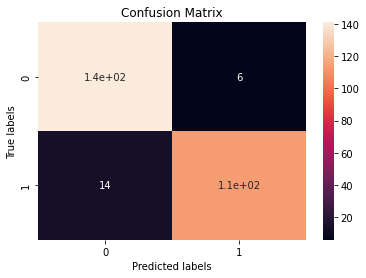

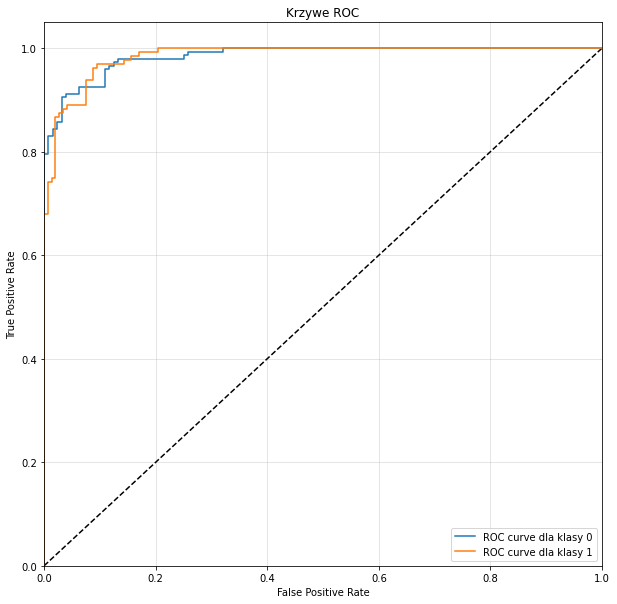

In [ ]:
#przewidywanie = np.argmax(siec_1.predict(test_data),axis=1)
przewidywanie = model.predict_proba(znormalizowany_test) 
przewidywanie = model.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
roc_auc

##Sieć 2

In [ ]:
model2 = Sequential()
#smaller_model
model2.add(Dense(40, activation='relu', input_shape=(znormalizowany_trening.shape[1],)))
model2.add(Dense(40, activation='relu'))
model2.add(Dense(2, activation='softmax'))

model2.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model2.summary()
siec_2_history = model2.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 40)                200       
_________________________________________________________________
dense_32 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 82        
Total params: 1,922
Trainable params: 1,922
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 0s 1ms/step - loss: 0.6568 - accuracy: 0.6819 - binary_crossentropy: 0.6568
Epoch 2/15
46/46 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.7675 - binary_crossentropy: 0.6309
Epoch 3/15
46/46 [==============================] - 0s 1ms/step - loss: 0.6066 - accuracy: 0.8013 - binary_crossentropy: 0.60

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Accuracy:
89.81818181818181
TN - True Negative: 136
FP - False Positive: 11
FN - False Negative: 17
TP - True Positive: 111
False Positive Rate
0.07482993197278912
False Negative Rate
0.1328125
Precision
0.9098360655737705
recall
0.8671875
AUC_SCORE


0.8961787840136054

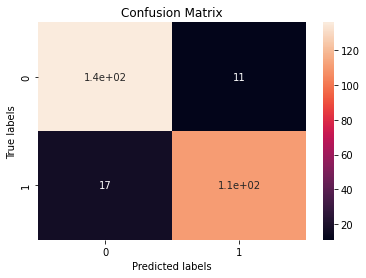

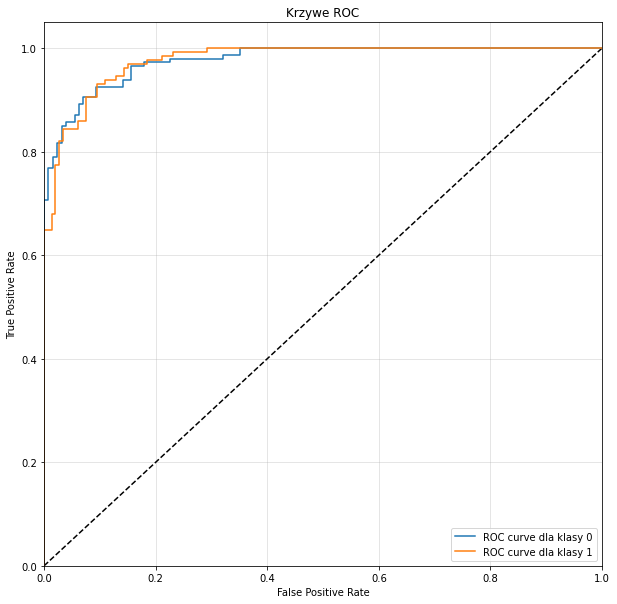

In [ ]:
przewidywanie = model2.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model2, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

##3 sieć

In [ ]:
model3 = Sequential()
#bigger_model
model3.add(Dense(120, activation='relu', input_shape=(znormalizowany_trening.shape[1],)))
model3.add(Dense(56, activation='relu'))
model3.add(Dense(2, activation='softmax'))

model3.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model3.summary()
siec_3_history = model3.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 120)               600       
_________________________________________________________________
dense_35 (Dense)             (None, 56)                6776      
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 114       
Total params: 7,490
Trainable params: 7,490
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 1s 3ms/step - loss: 0.6693 - accuracy: 0.6718 - binary_crossentropy: 0.6693
Epoch 2/15
46/46 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 0.7703 - binary_crossentropy: 0.6380
Epoch 3/15
46/46 [==============================] - 0s 4ms/step - loss: 0.6082 - accuracy: 0.8232 - binary_crossentropy: 0.60

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:
93.45454545454545
TN - True Negative: 143
FP - False Positive: 4
FN - False Negative: 14
TP - True Positive: 114
False Positive Rate
0.027210884353741496
False Negative Rate
0.109375
Precision
0.9661016949152542
recall
0.890625
AUC_SCORE


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.9317070578231292

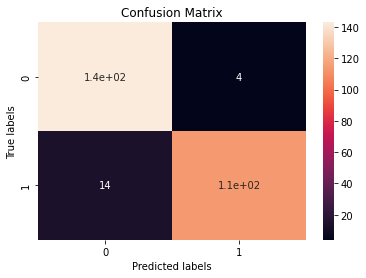

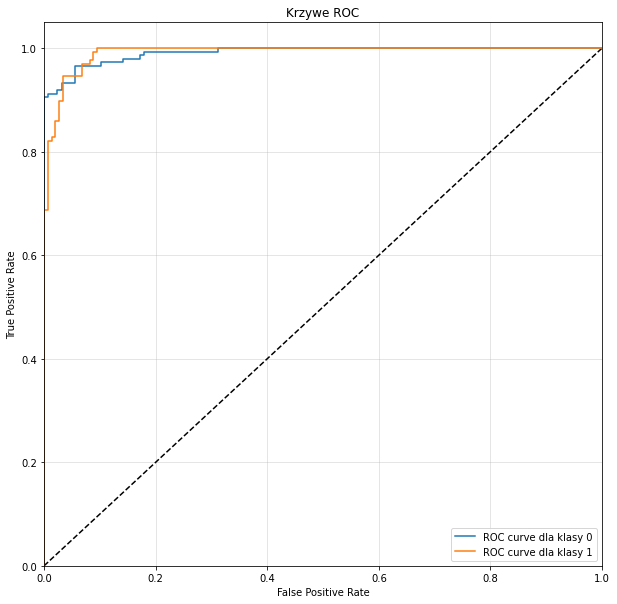

In [ ]:
przewidywanie = model3.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model3, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

##4 sieć

In [ ]:
model4 = Sequential()
#l2_model
model4.add(Dense(160, activation='relu', input_shape=(znormalizowany_trening.shape[1],)))
model4.add(Dense(80, activation='sigmoid'))
model4.add(Dense(2, activation='softmax'))

model4.compile(optimizer='SGD',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

model4.summary()

siec_4_history = model4.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 160)               800       
_________________________________________________________________
dense_38 (Dense)             (None, 80)                12880     
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 162       
Total params: 13,842
Trainable params: 13,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 1s 2ms/step - loss: 0.7133 - accuracy: 0.5606 - binary_crossentropy: 0.7133
Epoch 2/15
46/46 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5606 - binary_crossentropy: 0.6862
Epoch 3/15
46/46 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5606 - binary_crossentropy: 0.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:
66.18181818181819
TN - True Negative: 147
FP - False Positive: 0
FN - False Negative: 93
TP - True Positive: 35
False Positive Rate
0.0
False Negative Rate
0.7265625
Precision
1.0
recall
0.2734375
AUC_SCORE


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.63671875

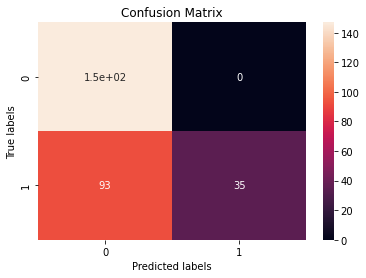

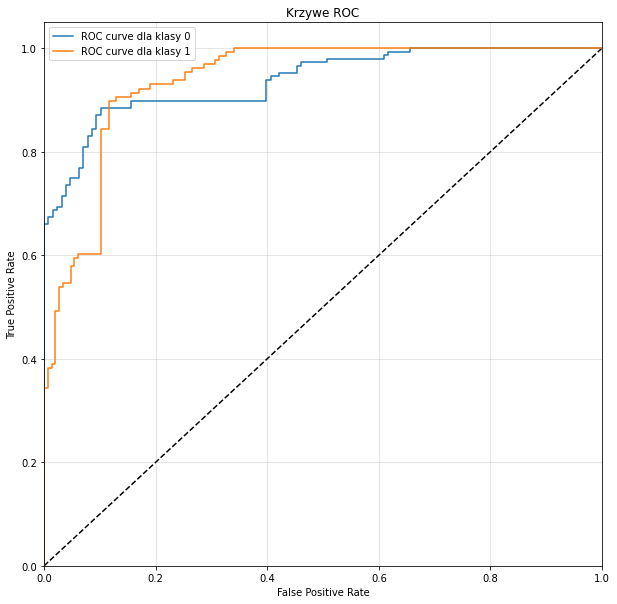

In [ ]:
przewidywanie = model4.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model4, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

##5 sieć

In [ ]:
model5 = Sequential()
#dropout_model
model5.add(Dense(160, activation='relu', input_shape=(znormalizowany_trening.shape[1],)))
model5.add(Dropout(0.5))
model5.add(Dense(160, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(2, activation='softmax'))

model5.compile(optimizer='SGD',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

model5.summary()
model5_history = model5.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 160)               800       
_________________________________________________________________
dropout_3 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 160)               25760     
_________________________________________________________________
dropout_4 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 322       
Total params: 26,882
Trainable params: 26,882
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 2s 3ms/step - loss: 0.6835 - accuracy: 0.5889 - binary_crossent

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Accuracy:
91.63636363636364
TN - True Negative: 140
FP - False Positive: 7
FN - False Negative: 16
TP - True Positive: 112
False Positive Rate
0.047619047619047616
False Negative Rate
0.125
Precision
0.9411764705882353
recall
0.875
AUC_SCORE


0.9136904761904762

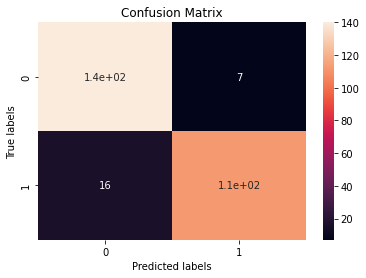

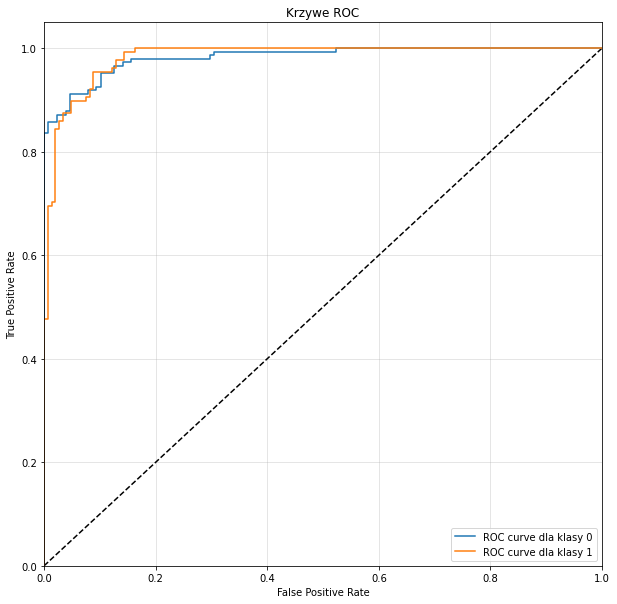

In [ ]:
przewidywanie = model5.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model5, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

##6 sieć

In [ ]:
model6 = Sequential()
model6.add(Dense(80, activation='tanh', input_shape=(znormalizowany_trening.shape[1],)  ))
model6.add(Dense(80, activation='relu'))
model6.add(Dense(60,activation='exponential'))
model6.add(Dense(2, activation='softmax'))

model6.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model6.summary()
model6_history = model6.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 80)                400       
_________________________________________________________________
dense_44 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_45 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 122       
Total params: 11,862
Trainable params: 11,862
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 1s 3ms/step - loss: 0.7642 - accuracy: 0.6190 - binary_crossentropy: 0.7642
Epoch 2/15
46/46 [==============================] - 0s 3ms/step - loss: 0.5482 - accuracy: 0.8277 - binary_crossentropy

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:
99.63636363636364
TN - True Negative: 146
FP - False Positive: 1
FN - False Negative: 0
TP - True Positive: 128
False Positive Rate
0.006802721088435374
False Negative Rate
0.0
Precision
0.9922480620155039
recall
1.0
AUC_SCORE


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.9965986394557823

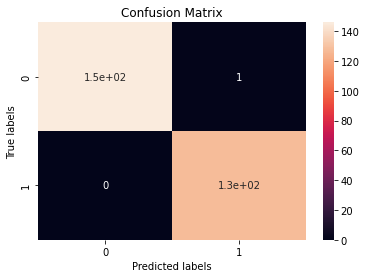

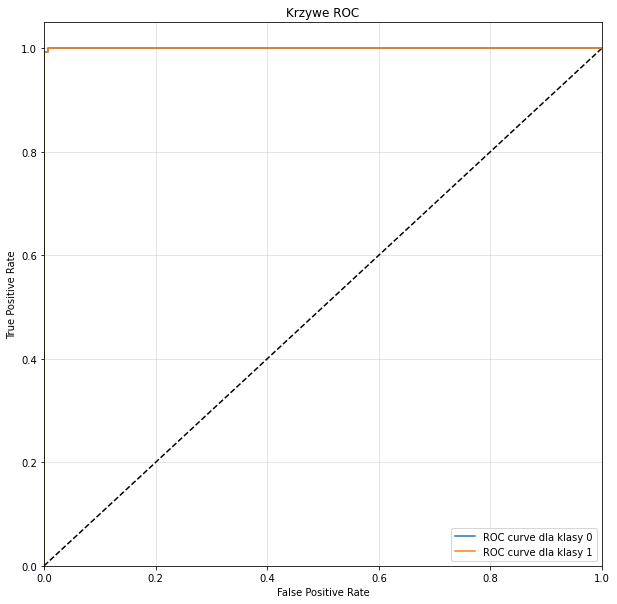

In [ ]:
przewidywanie = model6.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model6, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

##7 sieć

In [ ]:
model7 = Sequential()
model7.add(Dense(80, activation='tanh', input_shape=(znormalizowany_trening.shape[1],)))
model7.add(Dense(80, activation='elu'))
model7.add(Dense(2, activation='softmax'))

model7.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model7.summary()
model7_history = model7.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 80)                400       
_________________________________________________________________
dense_48 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_49 (Dense)             (None, 2)                 162       
Total params: 7,042
Trainable params: 7,042
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 1s 2ms/step - loss: 0.5947 - accuracy: 0.8186 - binary_crossentropy: 0.5947
Epoch 2/15
46/46 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.9407 - binary_crossentropy: 0.4482
Epoch 3/15
46/46 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.9262 - binary_crossentropy: 0.36

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:
98.54545454545455
TN - True Negative: 145
FP - False Positive: 2
FN - False Negative: 2
TP - True Positive: 126
False Positive Rate
0.013605442176870748
False Negative Rate
0.015625
Precision
0.984375
recall
0.984375
AUC_SCORE


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.9853847789115646

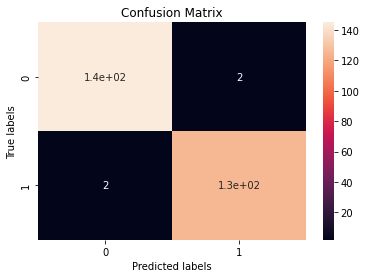

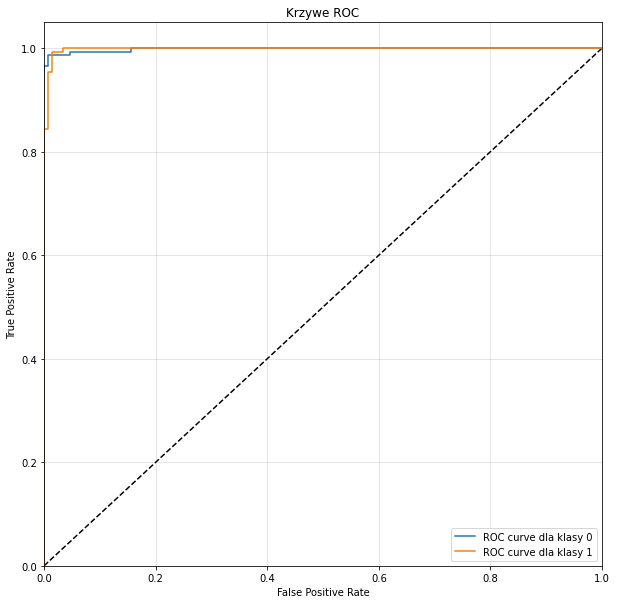

In [ ]:
przewidywanie = model7.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model7, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

##8 sieć

In [ ]:
model8 = Sequential()
model8.add(Dense(80, activation='tanh', input_shape=(znormalizowany_trening.shape[1],)))
model8.add(Dense(70, activation='relu'))
model8.add(Dense(60, activation='relu'))
model8.add(Dense(2, activation='softmax'))

model8.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model8.summary()
model8_history = model8.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 80)                400       
_________________________________________________________________
dense_51 (Dense)             (None, 70)                5670      
_________________________________________________________________
dense_52 (Dense)             (None, 60)                4260      
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 122       
Total params: 10,452
Trainable params: 10,452
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 1s 2ms/step - loss: 0.6972 - accuracy: 0.4713 - binary_crossentropy: 0.6972
Epoch 2/15
46/46 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.7739 - binary_crossentropy

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Accuracy:
97.81818181818181
TN - True Negative: 143
FP - False Positive: 4
FN - False Negative: 2
TP - True Positive: 126
False Positive Rate
0.027210884353741496
False Negative Rate
0.015625
Precision
0.9692307692307692
recall
0.984375
AUC_SCORE


0.9785820578231291

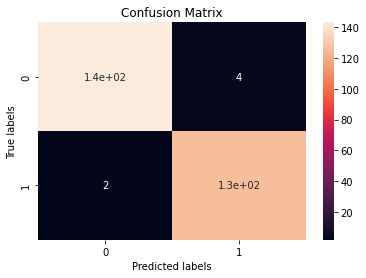

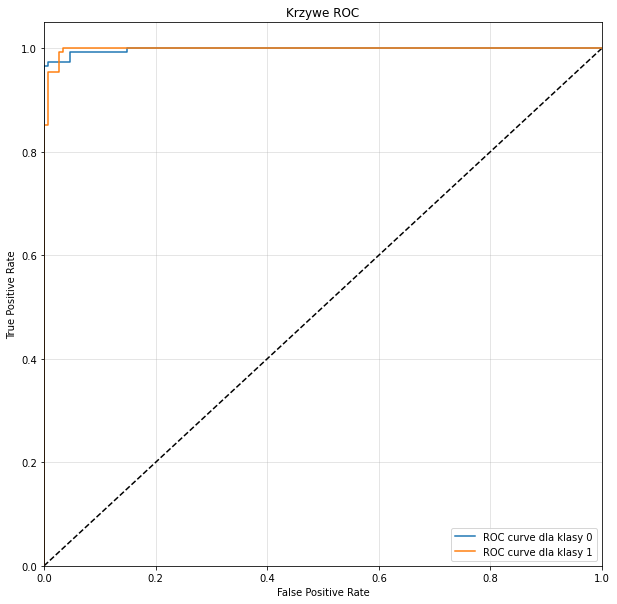

In [ ]:
przewidywanie = model8.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model8, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

##9 sieć

In [ ]:
model9 = Sequential()
model9.add(Dense(80, activation='tanh', input_shape=(znormalizowany_trening.shape[1],)))
model9.add(Dense(100, activation='elu'))
model9.add(Dropout(0.5))
model9.add(Dense(60, activation='relu'))
model9.add(Dense(2, activation='softmax'))

model9.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model9.summary()
model9_history = model9.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 80)                400       
_________________________________________________________________
dense_55 (Dense)             (None, 100)               8100      
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 122       
Total params: 14,682
Trainable params: 14,682
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 1s 2ms/step - loss: 0.6721 - accuracy: 0.6454 - binary_crossent

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Accuracy:
98.18181818181819
TN - True Negative: 144
FP - False Positive: 3
FN - False Negative: 2
TP - True Positive: 126
False Positive Rate
0.02040816326530612
False Negative Rate
0.015625
Precision
0.9767441860465116
recall
0.984375
AUC_SCORE


0.9819834183673469

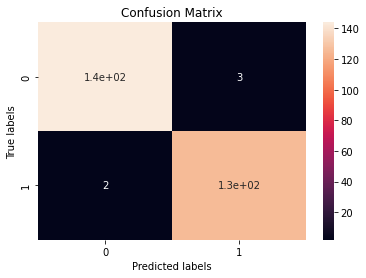

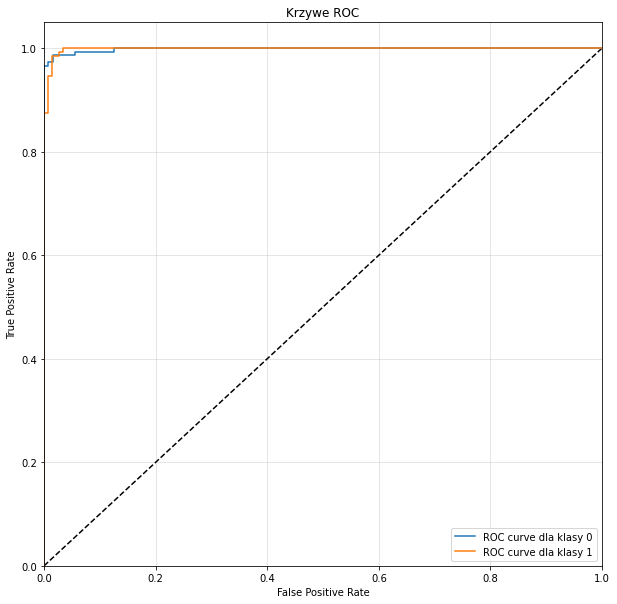

In [ ]:
przewidywanie = model9.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model9, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

##10 sieć

In [ ]:
model10 = Sequential()
model10.add(Dense(150, activation='elu', input_shape=(znormalizowany_trening.shape[1],)))
model10.add(Dropout(0.5))
model10.add(Dense(50, activation='elu'))
model10.add(Dense(200, activation='elu'))
model10.add(Dense(2, activation='softmax'))

model10.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model10.summary()
model10_history = model10.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 150)               750       
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_60 (Dense)             (None, 200)               10200     
_________________________________________________________________
dense_61 (Dense)             (None, 2)                 402       
Total params: 18,902
Trainable params: 18,902
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 1s 3ms/step - loss: 0.6491 - accuracy: 0.7056 - binary_crossent

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Accuracy:
98.9090909090909
TN - True Negative: 145
FP - False Positive: 2
FN - False Negative: 1
TP - True Positive: 127
False Positive Rate
0.013605442176870748
False Negative Rate
0.0078125
Precision
0.9844961240310077
recall
0.9921875
AUC_SCORE


0.9892910289115646

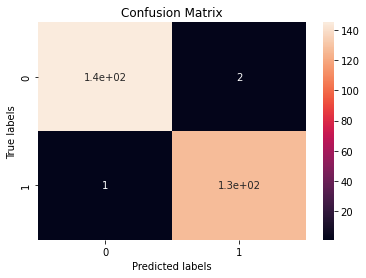

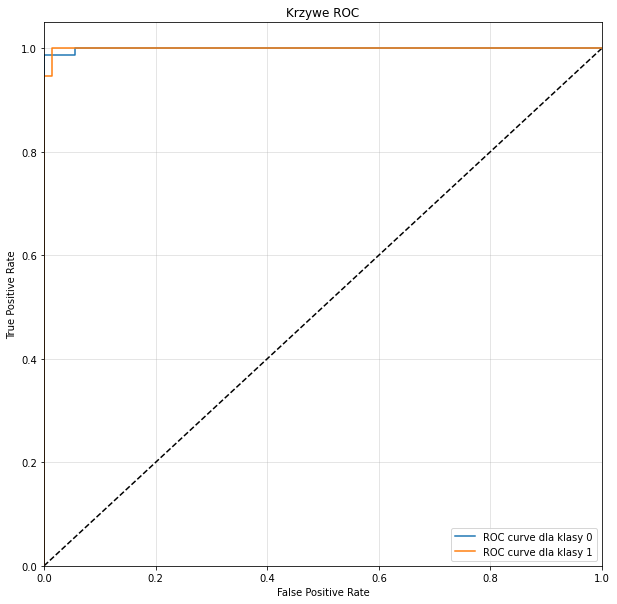

In [ ]:
przewidywanie = model10.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model10, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

##11 sieć

In [ ]:
model11 = Sequential()
model11.add(Dense(80, activation='elu', input_shape=(znormalizowany_trening.shape[1],)))
model11.add(Dense(300, activation='elu'))
model11.add(Dense(2, activation='softmax'))

model11.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model11.summary()
model11_history = model11.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 80)                400       
_________________________________________________________________
dense_63 (Dense)             (None, 300)               24300     
_________________________________________________________________
dense_64 (Dense)             (None, 2)                 602       
Total params: 25,302
Trainable params: 25,302
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 1s 3ms/step - loss: 0.6362 - accuracy: 0.6664 - binary_crossentropy: 0.6362
Epoch 2/15
46/46 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.8669 - binary_crossentropy: 0.4963
Epoch 3/15
46/46 [==============================] - 0s 3ms/step - loss: 0.4099 - accuracy: 0.8970 - binary_crossentropy: 0.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Accuracy:
98.54545454545455
TN - True Negative: 145
FP - False Positive: 2
FN - False Negative: 2
TP - True Positive: 126
False Positive Rate
0.013605442176870748
False Negative Rate
0.015625
Precision
0.984375
recall
0.984375
AUC_SCORE


0.9853847789115646

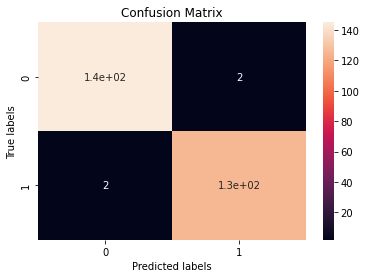

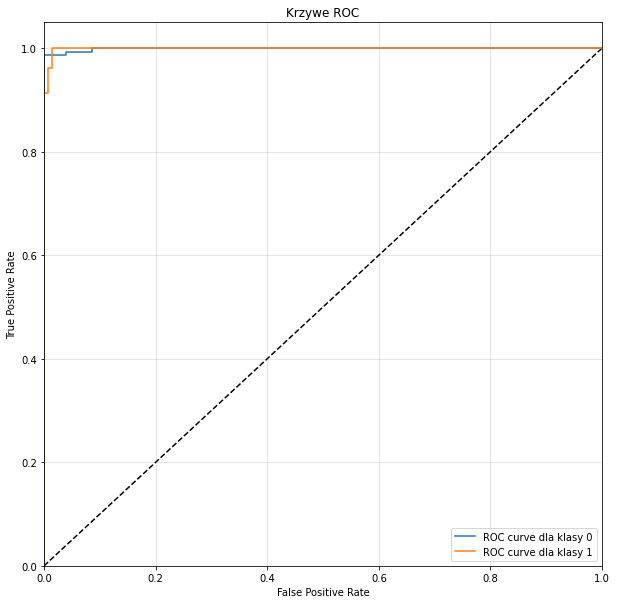

In [ ]:
przewidywanie = model11.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model11, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

##12 sieć

In [ ]:
model12 = Sequential()
model12.add(Dense(50, activation='softplus', input_shape=(znormalizowany_trening.shape[1],)))
model12.add(Dense(300, activation='selu'))
model12.add(Dense(2, activation='softmax'))

model12.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model12.summary()
model12_history = model12.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_66 (Dense)             (None, 300)               15300     
_________________________________________________________________
dense_67 (Dense)             (None, 2)                 602       
Total params: 16,152
Trainable params: 16,152
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 1s 3ms/step - loss: 0.6135 - accuracy: 0.6992 - binary_crossentropy: 0.6135
Epoch 2/15
46/46 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.8159 - binary_crossentropy: 0.5346
Epoch 3/15
46/46 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.8514 - binary_crossentropy: 0.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Accuracy:
96.36363636363636
TN - True Negative: 143
FP - False Positive: 4
FN - False Negative: 6
TP - True Positive: 122
False Positive Rate
0.027210884353741496
False Negative Rate
0.046875
Precision
0.9682539682539683
recall
0.953125
AUC_SCORE


0.9629570578231292

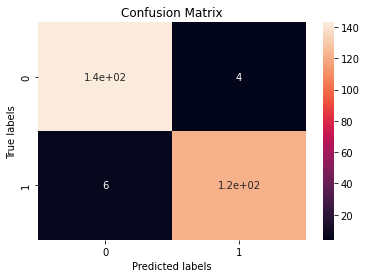

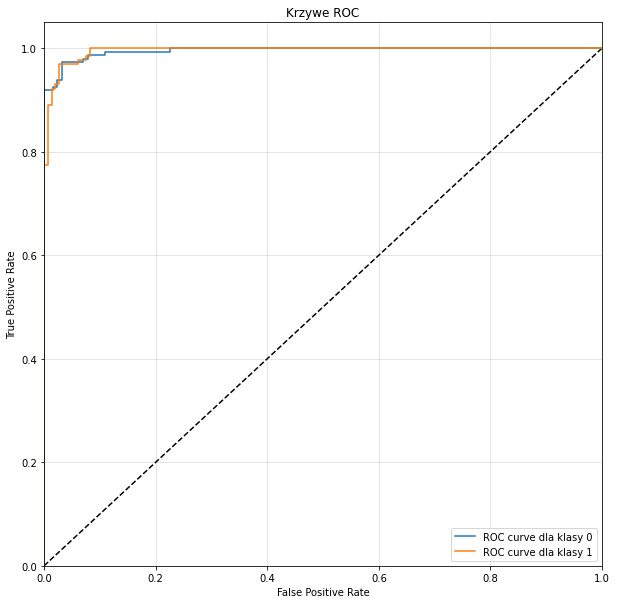

In [ ]:
przewidywanie = model12.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model12, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

##13 sieć

In [ ]:
model13 = Sequential()
model13.add(Dense(130, activation='softsign', input_shape=(znormalizowany_trening.shape[1],)))
model13.add(Dense(90, activation='softplus'))
model13.add(Dense(2, activation='softmax'))

model13.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model13.summary()
model13_history = model13.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 130)               650       
_________________________________________________________________
dense_69 (Dense)             (None, 90)                11790     
_________________________________________________________________
dense_70 (Dense)             (None, 2)                 182       
Total params: 12,622
Trainable params: 12,622
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 1s 3ms/step - loss: 0.6959 - accuracy: 0.6983 - binary_crossentropy: 0.6959
Epoch 2/15
46/46 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.7183 - binary_crossentropy: 0.6167
Epoch 3/15
46/46 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.8168 - binary_crossentropy: 0.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Accuracy:
93.0909090909091
TN - True Negative: 142
FP - False Positive: 5
FN - False Negative: 14
TP - True Positive: 114
False Positive Rate
0.034013605442176874
False Negative Rate
0.109375
Precision
0.957983193277311
recall
0.890625
AUC_SCORE


0.9283056972789115

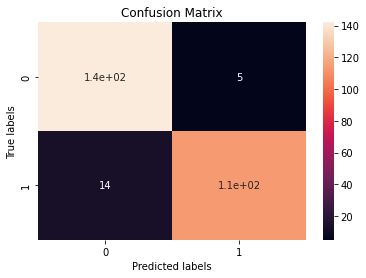

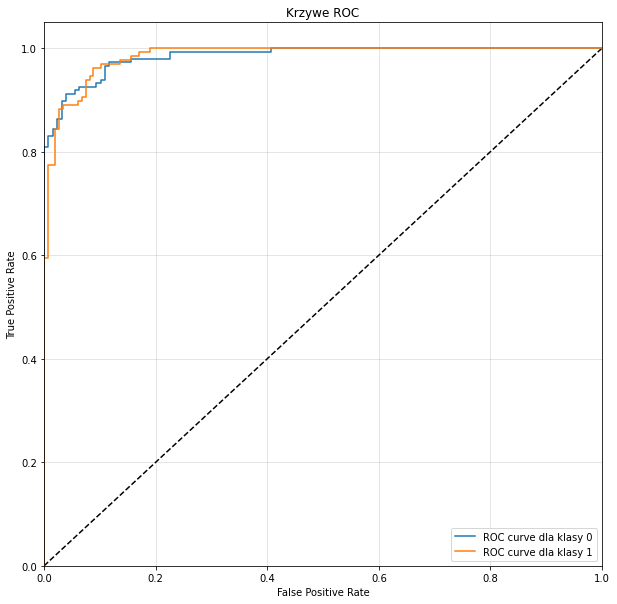

In [ ]:
przewidywanie = model13.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model13, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

##14 sieć

In [ ]:
model14 = Sequential()
model14.add(Dense(400, activation='softplus', input_shape=(znormalizowany_trening.shape[1],)))
model14.add(Dense(120, activation='relu'))
model14.add(Dense(2, activation='softmax'))

model14.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model14.summary()
model14_history = model14.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 400)               2000      
_________________________________________________________________
dense_72 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_73 (Dense)             (None, 2)                 242       
Total params: 50,362
Trainable params: 50,362
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 1s 3ms/step - loss: 0.6546 - accuracy: 0.6117 - binary_crossentropy: 0.6546
Epoch 2/15
46/46 [==============================] - 0s 3ms/step - loss: 0.6212 - accuracy: 0.7028 - binary_crossentropy: 0.6212
Epoch 3/15
46/46 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.7521 - binary_crossentropy: 0.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Accuracy:
92.0
TN - True Negative: 140
FP - False Positive: 7
FN - False Negative: 15
TP - True Positive: 113
False Positive Rate
0.047619047619047616
False Negative Rate
0.1171875
Precision
0.9416666666666667
recall
0.8828125
AUC_SCORE


0.9175967261904762

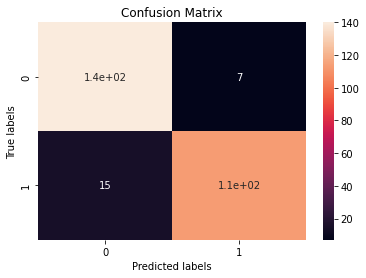

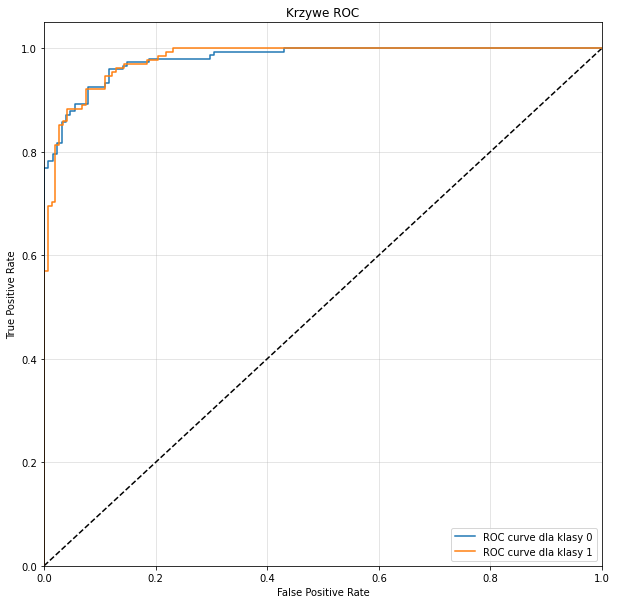

In [ ]:
przewidywanie = model14.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model14, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

##15 sieć

In [ ]:
model15 = Sequential()
model15.add(Dense(100, activation='selu', input_shape=(znormalizowany_trening.shape[1],)))
model15.add(Dense(400, activation='exponential'))
model15.add(Dense(320, activation='elu'))
model15.add(Dense(2, activation='softmax'))

model15.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model15.summary()
model15_history = model15.fit(znormalizowany_trening, trenowanie1, epochs=15, batch_size=24)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_75 (Dense)             (None, 400)               40400     
_________________________________________________________________
dense_76 (Dense)             (None, 320)               128320    
_________________________________________________________________
dense_77 (Dense)             (None, 2)                 642       
Total params: 169,862
Trainable params: 169,862
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 1s 5ms/step - loss: 0.5683 - accuracy: 0.7393 - binary_crossentropy: 0.5683
Epoch 2/15
46/46 [==============================] - 0s 8ms/step - loss: 0.3386 - accuracy: 0.9006 - binary_crossentro

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:
99.63636363636364
TN - True Negative: 146
FP - False Positive: 1
FN - False Negative: 0
TP - True Positive: 128
False Positive Rate
0.006802721088435374
False Negative Rate
0.0
Precision
0.9922480620155039
recall
1.0
AUC_SCORE


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.9965986394557823

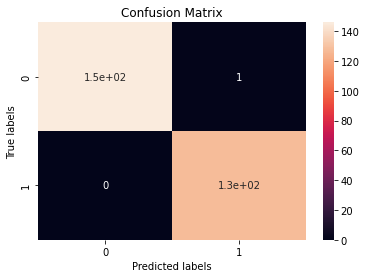

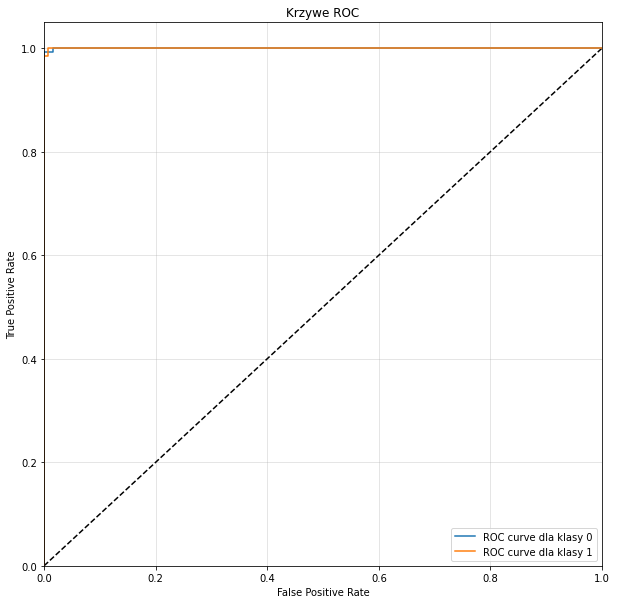

In [ ]:
przewidywanie = model15.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model15, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

#Najlepsza na 5 epokach

In [ ]:
model16 = Sequential()
model16.add(Dense(100, activation='selu', input_shape=(znormalizowany_trening.shape[1],)))
model16.add(Dense(400, activation='exponential'))
model16.add(Dense(320, activation='elu'))
model16.add(Dense(2, activation='softmax'))

model16.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model16.summary()
model16_history = model16.fit(znormalizowany_trening, trenowanie1, epochs=5, batch_size=24)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 400)               40400     
_________________________________________________________________
dense_2 (Dense)              (None, 320)               128320    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 642       
Total params: 169,862
Trainable params: 169,862
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
46/46 [==============================] - 3s 9ms/step - loss: 0.4900 - accuracy: 0.8067 - binary_crossentropy: 0.4900
Epoch 2/5
46/46 [==============================] - 0s 6ms/step - loss: 0.3200 - accuracy: 0.8933 - binary_crossentropy: 0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:
97.81818181818181
TN - True Negative: 133
FP - False Positive: 5
FN - False Negative: 1
TP - True Positive: 136
False Positive Rate
0.036231884057971016
False Negative Rate
0.0072992700729927005
Precision
0.9645390070921985
recall
0.9927007299270073


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


AUC_SCORE


0.9782344229345181

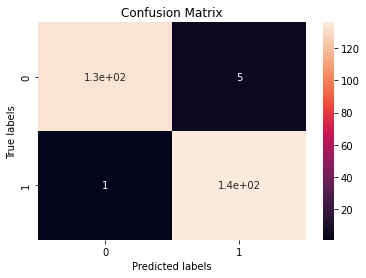

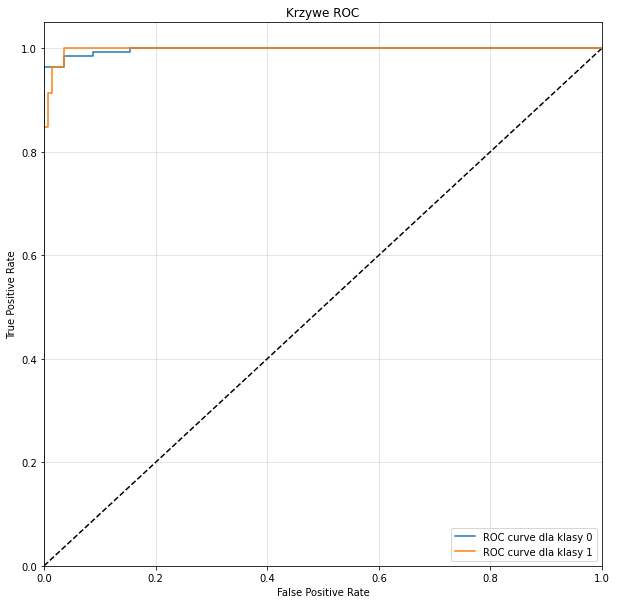

In [ ]:
przewidywanie = model16.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model16, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

#Najlepsza na 50 epokach

In [ ]:
model17 = Sequential()
model17.add(Dense(100, activation='selu', input_shape=(znormalizowany_trening.shape[1],)))
model17.add(Dense(400, activation='exponential'))
model17.add(Dense(320, activation='elu'))
model17.add(Dense(2, activation='softmax'))

model17.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model17.summary()
model17_history = model17.fit(znormalizowany_trening, trenowanie1, epochs=50, batch_size=24)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_9 (Dense)              (None, 400)               40400     
_________________________________________________________________
dense_10 (Dense)             (None, 320)               128320    
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 642       
Total params: 169,862
Trainable params: 169,862
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
46/46 [==============================] - 2s 5ms/step - loss: 0.4598 - accuracy: 0.8387 - binary_crossentropy: 0.4598
Epoch 2/50
46/46 [==============================] - 0s 9ms/step - loss: 0.2606 - accuracy: 0.9362 - binary_crossentrop

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:
100.0
TN - True Negative: 138
FP - False Positive: 0
FN - False Negative: 0
TP - True Positive: 137
False Positive Rate
0.0
False Negative Rate
0.0
Precision
1.0
recall
1.0
AUC_SCORE


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


1.0

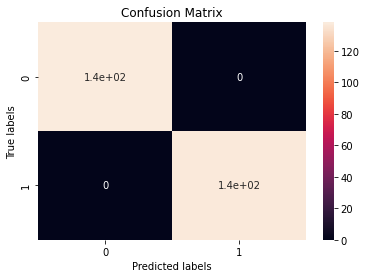

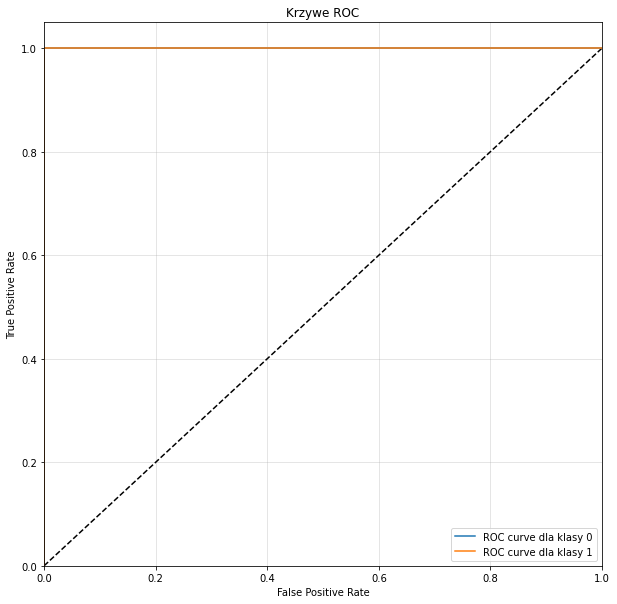

In [ ]:
przewidywanie = model17.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model17, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc

#Najlepsza na 100 epokach

In [ ]:
model18 = Sequential()
model18.add(Dense(100, activation='selu', input_shape=(znormalizowany_trening.shape[1],)))
model18.add(Dense(400, activation='exponential'))
model18.add(Dense(320, activation='elu'))
model18.add(Dense(2, activation='softmax'))

model18.compile(optimizer='SGD',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model18.summary()
model18_history = model18.fit(znormalizowany_trening, trenowanie1, epochs=100, batch_size=24)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_13 (Dense)             (None, 400)               40400     
_________________________________________________________________
dense_14 (Dense)             (None, 320)               128320    
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 642       
Total params: 169,862
Trainable params: 169,862
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] - 1s 5ms/step - loss: 0.5250 - accuracy: 0.7712 - binary_crossentropy: 0.5250
Epoch 2/100
46/46 [==============================] - 0s 6ms/step - loss: 0.3567 - accuracy: 0.8769 - binary_crossentr

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:
100.0
TN - True Negative: 138
FP - False Positive: 0
FN - False Negative: 0
TP - True Positive: 137
False Positive Rate
0.0
False Negative Rate
0.0
Precision
1.0
recall
1.0
AUC_SCORE


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


1.0

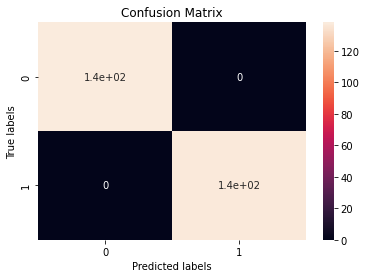

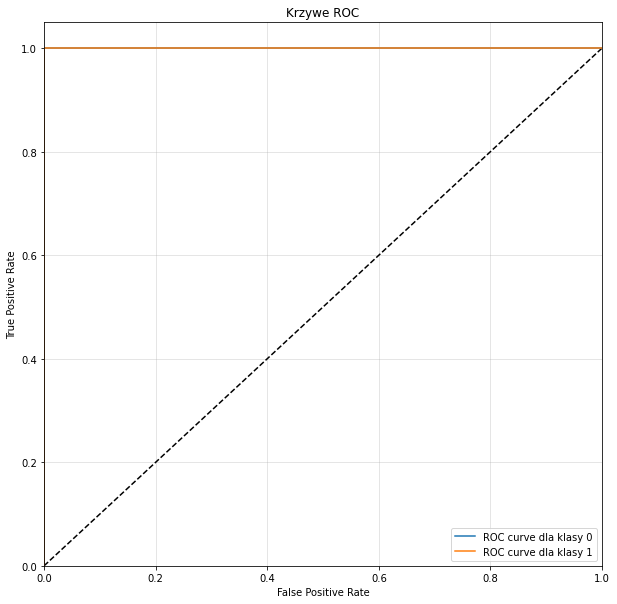

In [ ]:
przewidywanie = model18.predict_classes(znormalizowany_test)
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

print("Accuracy:")
print(accuracy(test_label2, przewidywanie))
cm = confusion_matrix(test_label2, przewidywanie)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print("False Positive Rate")
print(fpr)

# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print("False Negative Rate")
print(fnr)

# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print("Precision")
print(precision)

# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print("recall")
print(recall)

plot_multiclass_roc(model18, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))
roc_auc = roc_auc_score(test_label2, przewidywanie)
print("AUC_SCORE")
roc_auc